In [85]:
import os
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette('colorblind')

warnings.filterwarnings("ignore") # ignoring for anonymity

In [86]:
from generate_corpora import corpus_from_json
from analysis import *

In [87]:
models = ['grnn', 'gpt2']
constructions = ['cleft', 'intro_topic', 'nointro_topic', 'tough']
all_island_effects = []
all_island_surprisals = []
for model in models:
    for construction in constructions:
        control_filename =  os.path.join("grammar_outputs", "experiment1", model, f"{construction}_grammar_c.json")
        island_filename =  os.path.join("grammar_outputs", "experiment1", model, f"{construction}_grammar_i.json")
        control_tuples = corpus_from_json(control_filename, is_tuples = True)
        island_tuples = corpus_from_json(island_filename, is_tuples = True)
        all_island_effects += island_effects_for_model(model, control_tuples, island_tuples, construction)
        all_island_surprisals += island_surprisals("control", control_tuples, model, construction)
        all_island_surprisals += island_surprisals("island", island_tuples, model, construction)


# wilcox et al analyses are in other notebook
all_island_surprisals = pd.DataFrame(all_island_surprisals)
effects = pd.DataFrame(all_island_effects)

In [77]:
all_island_surprisals

,item,model,island,construction,wh,gap,surprisal
0,1,grnn,0,cleft,1,1,17.879575
1,1,grnn,0,cleft,0,1,22.502473
2,1,grnn,0,cleft,1,0,15.980307
3,1,grnn,0,cleft,0,0,13.432593
4,2,grnn,0,cleft,1,1,14.088758
...,...,...,...,...,...,...,...
110155,2186,gpt2,1,tough,0,0,19.425983
110156,2187,gpt2,1,tough,1,1,26.040264
110157,2187,gpt2,1,tough,0,1,23.944355
110158,2187,gpt2,1,tough,1,0,20.960012


In [78]:
grnn_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_grnn.json", is_tuples = True)
grnn_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_grnn.json", is_tuples = True)
gpt2_cnp_control = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_gpt2.json", is_tuples = True)
gpt2_cnp_island = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_gpt2.json", is_tuples = True)
grnn_cnp_island_effects = island_effects_for_model("grnn", grnn_cnp_control, grnn_cnp_island, "wh_movement")
gpt2_cnp_island_effects = island_effects_for_model("gpt2", gpt2_cnp_control, gpt2_cnp_island, "wh_movement")

In [79]:
construction_map = {
    "wh_movement": "Wh-Movement",
    "cleft": "Clefting",
    "intro_topic": "Topicalization with \n Intro",
    "nointro_topic": "Topicalization without \n Intro",
    "tough": "Tough Movement"
}
island_effects = pd.DataFrame(grnn_cnp_island_effects + gpt2_cnp_island_effects + all_island_effects)

island_effects["construction"] = island_effects['construction'].apply(lambda const: construction_map[const])


Text(0.5, 1.05, 'GPT2 Filler Effects')

<Figure size 4000x2200 with 0 Axes>

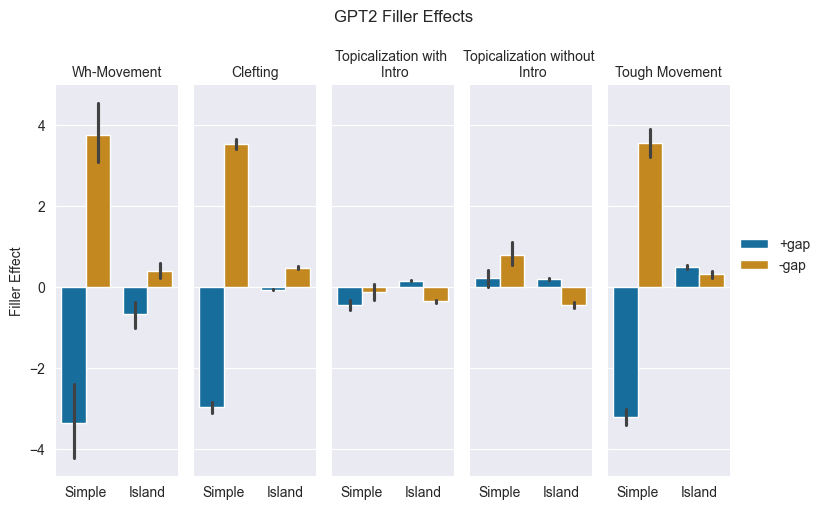

In [69]:
gpt2 = island_effects[island_effects['model'] == 'gpt2']
plt.figure(figsize=(40, 22))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=gpt2, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.suptitle("GPT2 Filler Effects", y = 1.05)
#plt.savefig("figures/gpt2_expt1.png")

Text(0.5, 1.05, 'Filler Effects in Pretrained RNN')

<Figure size 2400x1500 with 0 Axes>

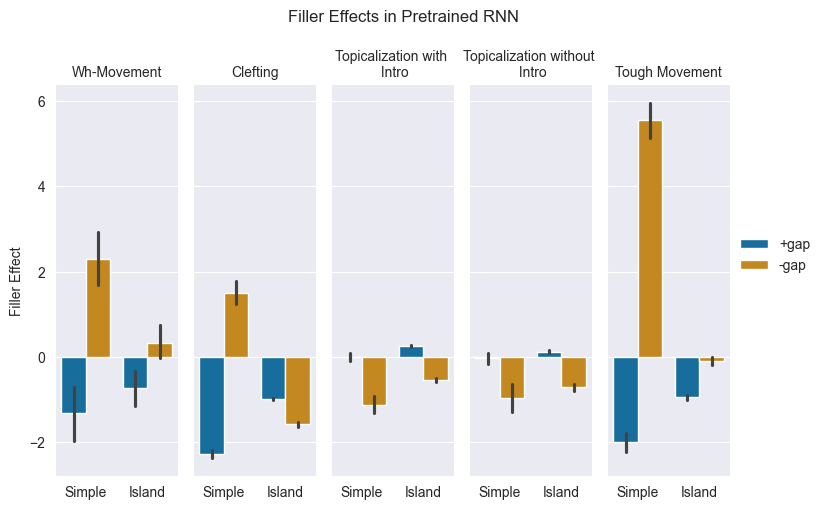

In [70]:
grnn = island_effects[island_effects['model'] == 'grnn']
plt.figure(figsize=(24, 15))
g = sns.catplot(x="condition", y="wh_effect", hue="gap", data=grnn, kind="bar", col = "construction",
            estimator="mean", aspect = 0.3)
g.set_titles(template='{col_name}')
g.set_axis_labels("", "Filler Effect")
g.legend.set_title("")
plt.suptitle("Filler Effects in Pretrained RNN", y = 1.05)
#plt.savefig("figures/grnn_expt1.png")

## Testing for the Filler-Gap Interaction in Simple Sentences

In [88]:
def fit_regression_model(formula, lm_name, condition, surprisal_data):
    condition_data = surprisal_data[(surprisal_data['model'] == lm_name) & (surprisal_data['construction'] == condition)]
    model = Lmer(formula, data = condition_data)
    model.fit()
    return model.summary()

fg_formula = "surprisal ~ wh * gap + (1 | item)"
simple_surprisals = all_island_surprisals[all_island_surprisals['island'] == 0]
pd.DataFrame(interaction_effects(fg_formula, constructions, models, simple_surprisals, False))

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 1944	 Groups: {'item': 486.0}

Log-likelihood: -5268.518 	 AIC: 10549.036

Random effects:

                 Name     Var    Std
item      (Intercept)   4.067  2.017
Residual               10.445  3.232

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 1944	 Groups: {'item': 486.0}

Log-likelihood: -5268.518 	 AIC: 10549.036

Random effects:

                 Name     Var    Std
item      (Intercept)   4.067  2.017
Residual               10.445  3.232

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 1944	 Groups: {'item': 486.0}

Log-likelihood:

,Estimate,P-val,Sig,model,condition,interaction_type
wh:gap,-3.788,0.000,***,grnn,cleft,filler_gap
wh:gap,1.120,0.000,***,grnn,intro_topic,filler_gap
wh:gap,0.936,0.059,.,grnn,nointro_topic,filler_gap
wh:gap,-7.547,0.000,***,grnn,tough,filler_gap
wh:gap,-6.490,0.000,***,gpt2,cleft,filler_gap
wh:gap,-0.332,0.073,.,gpt2,intro_topic,filler_gap
wh:gap,-0.588,0.048,*,gpt2,nointro_topic,filler_gap
wh:gap,-6.773,0.000,***,gpt2,tough,filler_gap


## Testing for Island Effects

We use Kobzeva et al's methods, fitting the regression model to the *filler effects* separately across +gap and -gap conditions. 

In [37]:
def code_island(value):
    if value == "Island" or 1:
        return -0.5
    else:
        return 0.5

island_effects['island'] = island_effects['condition'].apply(code_island)
formula = "wh_effect ~ island + (1 | item)"

In [81]:
def per_gap_models(formula : str, conditions : List[str], models : List[str], data : pd.DataFrame, filler_effects : bool):
    coefs = []
    gap = [0, 1]
    if filler_effects:
        gap = ["-gap", "+gap"]
    for model in models:
        for condition in conditions:
            for is_gap in gap:
                print(is_gap)
                gap_data = data[data['gap'] == is_gap]
                summary = fit_regression_model(formula, model, condition, gap_data)
                summary['model'] = model
                summary['construction'] = condition
                summary['gap'] = is_gap
                coefs.append(summary)
    return pd.concat(coefs)


In [39]:
per_gap_models(formula, island_effects['construction'].unique(), models, island_effects, True)
# the format of the construction names is different when we have the df for filler effects.

-gap
Linear mixed model fit by REML [’lmerMod’]
Formula: wh_effect~island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 56	 Groups: {'item': 28.0}

Log-likelihood: -100.982 	 AIC: 209.964

Random effects:

                 Name    Var    Std
item      (Intercept)  0.206  0.453
Residual               1.983  1.408

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: wh_effect~island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 56	 Groups: {'item': 28.0}

Log-likelihood: -100.982 	 AIC: 209.964

Random effects:

                 Name    Var    Std
item      (Intercept)  0.206  0.453
Residual               1.983  1.408

No random effect correlations specified

Fixed effects:

+gap
Linear mixed model fit by REML [’lmerMod’]
Formula: wh_effect~island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 56	 Groups: {'item': 28.0}

Log-likelihood: -97.975 	 

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig,model,construction,gap
(Intercept),1.310,0.905,1.715,0.207,27.000,6.336,0.000,***,grnn,Wh-Movement,-gap
island,1.976,1.238,2.713,0.376,27.000,5.250,0.000,***,grnn,Wh-Movement,-gap
(Intercept),-1.030,-1.457,-0.603,0.218,27.000,-4.730,0.000,***,grnn,Wh-Movement,+gap
island,-0.587,-1.214,0.039,0.320,27.000,-1.838,0.077,.,grnn,Wh-Movement,+gap
(Intercept),0.136,0.035,0.237,0.052,4595.053,2.636,0.008,**,grnn,Clefting,-gap
island,3.437,3.245,3.629,0.098,2389.868,35.123,0.000,***,grnn,Clefting,-gap
(Intercept),-1.637,-1.684,-1.590,0.024,4836.258,-68.143,0.000,***,grnn,Clefting,+gap
island,-1.295,-1.387,-1.203,0.047,2996.879,-27.620,0.000,***,grnn,Clefting,+gap
(Intercept),-0.766,-0.845,-0.687,0.040,4166.827,-19.006,0.000,***,grnn,Topicalization with \n Intro,-gap
island,-0.449,-0.596,-0.302,0.075,1934.141,-5.990,0.000,***,grnn,Topicalization with \n Intro,-gap


In [10]:
grnn.to_csv("data/pretrained_island_effects.csv", index=False)

In [61]:
island_formula = "surprisal~wh*gap*island+(gap||item)"
effects = interaction_effects(island_formula, constructions, models, all_island_surprisals)

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -52022.868 	 AIC: 104065.736

Random effects:

                 Name    Var    Std
item      (Intercept)  3.917  1.979
Residual               9.848  3.138

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item': 4374.0}

Log-likelihood: -52022.868 	 AIC: 104065.736

Random effects:

                 Name    Var    Std
item      (Intercept)  3.917  1.979
Residual               9.848  3.138

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~wh*gap*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 19440	 Groups: {'item':

Here, we're looking for negative interaction terms for the filler and gap, which shows the presence of *basic* licensing. If that's present, we look at the 3-way interaction between filler, gap, and island. This should be positive. 

In [62]:
pd.DataFrame(effects).reset_index()[['interaction_type', 'Estimate', 'P-val', 'model', 'condition']]

,interaction_type,Estimate,P-val,model,condition
0,filler_gap,-3.788,0.000,grnn,cleft
1,island_filler_gap,4.381,0.000,grnn,cleft
2,filler_gap,1.120,0.000,grnn,intro_topic
3,island_filler_gap,-0.325,0.281,grnn,intro_topic
4,filler_gap,0.936,0.063,grnn,nointro_topic
5,island_filler_gap,-0.099,0.852,grnn,nointro_topic
6,filler_gap,-7.547,0.000,grnn,tough
7,island_filler_gap,6.701,0.000,grnn,tough
8,filler_gap,-6.490,0.000,gpt2,cleft
9,island_filler_gap,5.952,0.000,gpt2,cleft


# Testing for Gap Effects

In [89]:
all_island_surprisals

,item,model,island,construction,wh,gap,surprisal
0,1,grnn,0,cleft,1,1,17.879575
1,1,grnn,0,cleft,0,1,22.502473
2,1,grnn,0,cleft,1,0,15.980307
3,1,grnn,0,cleft,0,0,13.432593
4,2,grnn,0,cleft,1,1,14.088758
...,...,...,...,...,...,...,...
110155,2186,gpt2,1,tough,0,0,19.425983
110156,2187,gpt2,1,tough,1,1,26.040264
110157,2187,gpt2,1,tough,0,1,23.944355
110158,2187,gpt2,1,tough,1,0,20.960012


In [93]:
def code_island(value):
    if value == 1:
        return -0.5
    else:
        return 0.5
def code_filler(value):
    if value == 1:
        return 0.5
    else:
        return -0.5

In [96]:
all_island_surprisals['island'] = all_island_surprisals['island'].apply(code_island)
all_island_surprisals['filler'] = all_island_surprisals['wh'].apply(code_filler)

In [109]:
def per_gap_models(formula : str, conditions : List[str], models : List[str], data : pd.DataFrame, filler_effects : bool):
    coefs = []
    gap = [0, 1]
    if filler_effects:
        gap = ["-gap", "+gap"]
    for model in models:
        for condition in conditions:
            for is_gap in gap:
                print(is_gap)
                gap_data = data[data['gap'] == is_gap]
                summary = fit_regression_model(formula, model, condition, gap_data)
                summary['model'] = model
                summary['construction'] = condition
                summary['gap'] = is_gap
                coefs.append(summary)
    return pd.concat(coefs)


In [117]:
formula = "surprisal ~ filler * island + (1 | item)"
gap_effects = per_gap_models(formula, all_island_surprisals.construction.unique(), models, all_island_surprisals, False)
gap_effects

0
Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~filler*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 4374.0}

Log-likelihood: -24763.888 	 AIC: 49539.775

Random effects:

                 Name     Var    Std
item      (Intercept)  17.417  4.173
Residual                2.922  1.709

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~filler*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 4374.0}

Log-likelihood: -24763.888 	 AIC: 49539.775

Random effects:

                 Name     Var    Std
item      (Intercept)  17.417  4.173
Residual                2.922  1.709

No random effect correlations specified

Fixed effects:

1
Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~filler*island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'i

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig,model,construction,gap
(Intercept),22.464,22.319,22.608,0.074,6497.266,304.753,0.000,***,grnn,cleft,0
filler,-0.039,-0.152,0.075,0.058,5343.358,-0.669,0.503,,grnn,cleft,0
island,2.869,2.720,3.018,0.076,5734.052,37.653,0.000,***,grnn,cleft,0
filler:island,3.088,2.861,3.314,0.116,5343.358,26.712,0.000,***,grnn,cleft,0
(Intercept),16.220,16.135,16.305,0.043,6023.251,373.818,0.000,***,grnn,cleft,1
...,...,...,...,...,...,...,...,...,...,...,...
filler:island,3.242,2.901,3.583,0.174,2657.835,18.641,0.000,***,gpt2,tough,0
(Intercept),23.177,23.039,23.315,0.071,3123.292,328.637,0.000,***,gpt2,tough,1
filler,-1.368,-1.470,-1.265,0.052,2661.867,-26.176,0.000,***,gpt2,tough,1
island,-3.997,-4.132,-3.861,0.069,2830.548,-57.881,0.000,***,gpt2,tough,1


In [119]:
gap_effects[gap_effects['model'] == "grnn"]

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig,model,construction,gap
(Intercept),22.464,22.319,22.608,0.074,6497.266,304.753,0.000,***,grnn,cleft,0
filler,-0.039,-0.152,0.075,0.058,5343.358,-0.669,0.503,,grnn,cleft,0
island,2.869,2.720,3.018,0.076,5734.052,37.653,0.000,***,grnn,cleft,0
filler:island,3.088,2.861,3.314,0.116,5343.358,26.712,0.000,***,grnn,cleft,0
(Intercept),16.220,16.135,16.305,0.043,6023.251,373.818,0.000,***,grnn,cleft,1
filler,-1.636,-1.695,-1.577,0.030,5344.815,-54.330,0.000,***,grnn,cleft,1
island,-1.456,-1.535,-1.378,0.040,5630.705,-36.521,0.000,***,grnn,cleft,1
filler:island,-1.293,-1.411,-1.175,0.060,5344.815,-21.469,0.000,***,grnn,cleft,1
(Intercept),21.744,21.601,21.888,0.073,5947.555,296.750,0.000,***,grnn,intro_topic,0
filler,-0.832,-0.930,-0.735,0.050,5343.414,-16.733,0.000,***,grnn,intro_topic,0


In [20]:
grnn_clefting = grnn[grnn['construction'] == 'Topicalization with \n Intro']
gap_effects = grnn_clefting[grnn_clefting['gap'] == '+gap']
nogap_effects = grnn_clefting[grnn_clefting['gap'] == '-gap']
formula = "wh_effect ~ island + (1 | item)"
model = Lmer(formula, data = gap_effects)
model.fit()
model.summary()

Linear mixed model fit by REML [’lmerMod’]
Formula: wh_effect~island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 4860	 Groups: {'item': 4374.0}

Log-likelihood: -5218.743 	 AIC: 10445.485

Random effects:

                 Name    Var    Std
item      (Intercept)  0.142  0.377
Residual               0.362  0.602

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: wh_effect~island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 4860	 Groups: {'item': 4374.0}

Log-likelihood: -5218.743 	 AIC: 10445.485

Random effects:

                 Name    Var    Std
item      (Intercept)  0.142  0.377
Residual               0.362  0.602

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),0.067,0.034,0.10,0.017,4503.807,3.966,0.0,***
island,-0.373,-0.435,-0.31,0.032,2447.520,-11.701,0.0,***


In [21]:
model = Lmer(formula, data = nogap_effects)
model.fit()
model.summary()

Linear mixed model fit by REML [’lmerMod’]
Formula: wh_effect~island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 4860	 Groups: {'item': 4374.0}

Log-likelihood: -9460.127 	 AIC: 18928.254

Random effects:

                 Name    Var    Std
item      (Intercept)  0.954  0.977
Residual               1.948  1.396

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: wh_effect~island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 4860	 Groups: {'item': 4374.0}

Log-likelihood: -9460.127 	 AIC: 18928.254

Random effects:

                 Name    Var    Std
item      (Intercept)  0.954  0.977
Residual               1.948  1.396

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),-0.766,-0.845,-0.687,0.040,4166.827,-19.006,0.0,***
island,-0.449,-0.596,-0.302,0.075,1934.141,-5.990,0.0,***


In [38]:
def code_island(value):
    if value == 1:
        return -0.5
    else:
        return 0.5

def code_filler(value):
    if value == 1:
        return 0.5
    else:
        return -0.5

def reformat_for_gap(data):
    data['island'] = data['island'].apply(code_island)
    data['filler'] = data['wh'].apply(code_filler)
    return data
island_gap_surprisals = reformat_for_gap(all_island_surprisals)

In [39]:
grnn = island_gap_surprisals[(island_gap_surprisals['model'] == 'grnn')]
gap = grnn[grnn['gap'] == 1]
no_gap = grnn[grnn['gap'] == 0]

In [72]:
formula = "surprisal ~ filler + island +(1 | item)"
fit_regression_model(formula, "grnn", "intro_topic", gap)

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~filler+island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 4374.0}

Log-likelihood: -18303.197 	 AIC: 36616.394

Random effects:

                 Name    Var    Std
item      (Intercept)  7.098  2.664
Residual               0.561  0.749

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~filler+island+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 4374.0}

Log-likelihood: -18303.197 	 AIC: 36616.394

Random effects:

                 Name    Var    Std
item      (Intercept)  7.098  2.664
Residual               0.561  0.749

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),16.997,16.911,17.083,0.044,5501.871,389.284,0.0,***
filler,0.228,0.198,0.258,0.015,5344.262,14.994,0.0,***
island,-1.049,-1.115,-0.983,0.034,5530.258,-31.149,0.0,***


In [71]:
formula = "surprisal ~ island + filler + (1 | item)"
fit_regression_model(formula, "grnn", "intro_topic", no_gap)

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~island+filler+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 4374.0}

Log-likelihood: -24086.640 	 AIC: 48183.280

Random effects:

                 Name     Var    Std
item      (Intercept)  18.726  4.327
Residual                2.178  1.476

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: surprisal~island+filler+(1|item)

Family: gaussian	 Inference: parametric

Number of observations: 9720	 Groups: {'item': 4374.0}

Log-likelihood: -24086.640 	 AIC: 48183.280

Random effects:

                 Name     Var    Std
item      (Intercept)  18.726  4.327
Residual                2.178  1.476

No random effect correlations specified

Fixed effects:



,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),21.744,21.601,21.888,0.073,5956.296,296.608,0.0,***
island,0.899,0.769,1.028,0.066,5617.038,13.589,0.0,***
filler,-0.600,-0.658,-0.541,0.030,5344.423,-20.025,0.0,***
